In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm
import random

# Converting text file into dataframe

In [ ]:
#<<<<<<<<Enter the path of the dataset here>>>>>>>>>>
path = r'C:\Users\Ashwaq Ahmed\Documents\pythoncode\MAjor\pythonProject2\dataset\agri_data\data'

In [11]:
data = [os.path.join(path,x) for x in os.listdir(path)]
images = [data[x] for x in range(len(data)) if data[x].endswith('.jpeg')]
labels = [data[x] for x in range(len(data)) if data[x].endswith('.txt')]

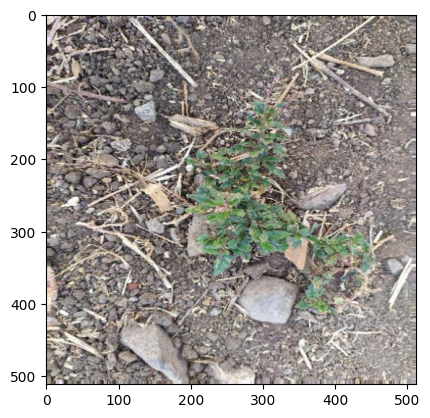

In [14]:
#checking if conversion is working or not
plt.imshow(cv2.cvtColor(cv2.imread(images[0]),cv2.COLOR_BGR2RGB))

In [ ]:
#<<Making a Dataframe with columns>>

df = pd.DataFrame(columns=['image_name','object','x_cen','y_cen','w','h','image_path'])
i=0
for id in tqdm(images):
    label = open(id[:-5]+'.txt','r') 
    a = label.read()
    label.close()
    label = a.split('\n')
    cleaned_label = label[:-1]
    
    for name in cleaned_label:

        ind_label = name.split(' ') 
        #taken from path of the image
        df.loc[i,'image_path']=id
        df.loc[i,'image_name'] = id[87:]
        #taken from label of the image
        df.loc[i,'object'] = int(ind_label[0])
        df.loc[i,'x_cen'] = float(ind_label[1])
        df.loc[i,'y_cen'] = float(ind_label[2])
        df.loc[i,'w'] = float(ind_label[3])
        df.loc[i,'h'] = float(ind_label[4])
        i += 1
    

100%|██████████| 1300/1300 [00:18<00:00, 69.52it/s]


In [ ]:
#The dataframe structure
df.head()

,image_name,object,x_cen,y_cen,w,h,image_path
0,agri_0_1009.jpeg,1,0.608398,0.498047,0.541016,0.53125,C:\Users\Ashwaq Ahmed\Documents\pythoncode\MAj...
1,agri_0_1017.jpeg,1,0.496094,0.384766,0.960938,0.753906,C:\Users\Ashwaq Ahmed\Documents\pythoncode\MAj...
2,agri_0_1018.jpeg,1,0.445312,0.483398,0.808594,0.634766,C:\Users\Ashwaq Ahmed\Documents\pythoncode\MAj...
3,agri_0_1020.jpeg,1,0.494141,0.350586,0.730469,0.611328,C:\Users\Ashwaq Ahmed\Documents\pythoncode\MAj...
4,agri_0_1024.jpeg,1,0.601562,0.448242,0.570312,0.595703,C:\Users\Ashwaq Ahmed\Documents\pythoncode\MAj...


# Converting dataframe into Pascal-voc format

In [17]:
#Initialising column name for pascal-voc dataframe
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax','path']

In [22]:
pascal_voc = pd.DataFrame(columns=column_name)
for i in tqdm(range(len(df))):
    pascal_voc.loc[i,'filename'] = (df.loc[i,'image_name'])
    pascal_voc.loc[i,'width'] = 512
    pascal_voc.loc[i,'height']= 512  
    pascal_voc.loc[i,'path']= (df.loc[i,'image_path'])
    if df.loc[i,'object'] == 0:    
        pascal_voc.loc[i,'class'] = 'crop'
    else:
        pascal_voc.loc[i,'class'] = 'weed'
    pascal_voc.loc[i,'xmin']  = int((df.loc[i,'x_cen'] - df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymin']  = int((df.loc[i,'y_cen'] - df.loc[i,'h']/2)*512)
    pascal_voc.loc[i,'xmax']  = int((df.loc[i,'x_cen'] + df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymax']  = int((df.loc[i,'y_cen'] + df.loc[i,'h']/2)*512) 
    

100%|██████████| 2072/2072 [00:01<00:00, 1201.82it/s]


In [24]:
print(pascal_voc)

              filename width height class xmin ymin xmax ymax   
0     agri_0_1009.jpeg   512    512  weed  172  119  449  391  \
1     agri_0_1017.jpeg   512    512  weed    8    4  500  390   
2     agri_0_1018.jpeg   512    512  weed   20   84  434  409   
3     agri_0_1020.jpeg   512    512  weed   66   23  440  336   
4     agri_0_1024.jpeg   512    512  weed  161   76  453  381   
...                ...   ...    ...   ...  ...  ...  ...  ...   
2067  agri_0_9963.jpeg   512    512  weed   58   80  455  336   
2068  agri_0_9971.jpeg   512    512  weed   45  132  228  311   
2069  agri_0_9971.jpeg   512    512  weed   52  355  227  512   
2070  agri_0_9971.jpeg   512    512  weed  272   80  458  310   
2071  agri_0_9971.jpeg   512    512  weed  218  342  313  431   

                                                   path  
0     C:\Users\Ashwaq Ahmed\Documents\pythoncode\MAj...  
1     C:\Users\Ashwaq Ahmed\Documents\pythoncode\MAj...  
2     C:\Users\Ashwaq Ahmed\Documents\pythonc

# Visualizing labels

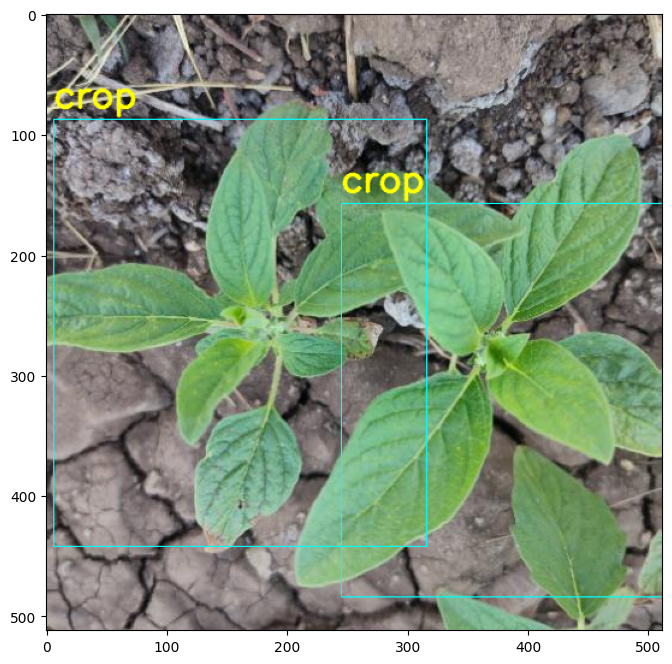

In [20]:
any_index_number = random.randrange(2073)
tempimg=cv2.imread(pascal_voc.loc[any_index_number,'path'])
test_img=cv2.cvtColor(tempimg,cv2.COLOR_BGR2RGB)
#test_img = cv2.cvtColor(cv2.imread(path+pascal_voc.loc[any_index_number,'filename']),cv2.COLOR_BGR2RGB)
test_df = pascal_voc[pascal_voc['filename']==pascal_voc.loc[any_index_number,'filename']].reset_index(drop=True)
for i in range(len(test_df)):
    rec = cv2.rectangle(test_img, (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']), (test_df.loc[i,'xmax'],test_df.loc[i,'ymax']), (0,255,255), 1, 1) 
    text = cv2.putText(rec, test_df.loc[i,'class'], (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']-10), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)
    
plt.figure(figsize=(8,8))    
plt.imshow(text)
plt.axis('on')
plt.show()

# Saving label file

In [21]:
#<<Enter the filename here>>
pascal_voc.to_csv('pascal_voc_format.csv',index=False)